# 机器学习作业四
- 姓名：周延霖
- 学号：2013921
- 专业：信息安全

## 实验要求

题目：朴素贝叶斯分类器

> 基本要求：


1. 采用分层采样的方式将数据集划分为训练集和测试集。
2. 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。


  
> 中级要求


使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。


> 高级要求

在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。



**截止日期：11月18日**

- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

## 基本要求

In [1]:
import math
import numpy as np  
import pandas as pd
import random
import csv
import operator
import matplotlib.pyplot as plt

In [2]:
f = open('wine.data','r')
types = [[],[],[]]                      #按类分的所有数据
test_data = [[],[],[]]
train_data = [[],[],[]]
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数
means = [[],[],[]]                      #每一类的均值
std = [[],[],[]]                        #每一类的标准差

In [3]:
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    temp = myline.pop(0)
    types[temp - 1].append(myline)
test_len = [round(len(types[i]) / 5) for i in range(3)] # 按照4:1的方式划分测试集和训练集，之后可以进行更改
data_num = sum([len(types[i]) for i in range(3)])

In [4]:
print(types[0][1])

[13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05, 3.4, 1050.0]


In [5]:
print(test_len)
print(data_num)

[12, 14, 10]
178


### 分层采样

In [6]:
test_data[0] = random.sample(types[0], test_len[0])
test_data[1] = random.sample(types[1], test_len[1])
test_data[2] = random.sample(types[2], test_len[2])
train_data[0] = [i for i in types[0] if i not in test_data[0]]
train_data[1] = [i for i in types[1] if i not in test_data[1]]
train_data[2] = [i for i in types[2] if i not in test_data[2]]

In [7]:
# print(test_data[0])
# print(train_data[1])

### 贝叶斯预测

In [8]:
print(np.mean(train_data[0], axis = 0))

[1.37582979e+01 2.00510638e+00 2.42936170e+00 1.67723404e+01
 1.06553191e+02 2.86361702e+00 3.00702128e+00 2.83829787e-01
 1.92744681e+00 5.59255319e+00 1.05234043e+00 3.14851064e+00
 1.11217021e+03]


In [9]:
print(np.std(train_data[0], axis = 0))

[4.81983134e-01 6.91538132e-01 2.20264872e-01 2.63436392e+00
 9.86894659e+00 3.42477988e-01 4.10261540e-01 6.64783821e-02
 4.04124839e-01 1.26779498e+00 1.16476877e-01 3.60413349e-01
 2.23107771e+02]


In [10]:
means[0] = np.mean(train_data[0], axis = 0)
std[0] = np.std(train_data[0], axis = 0)

means[1] = np.mean(train_data[1], axis = 0)
std[1] = np.std(train_data[1], axis = 0)

means[2] = np.mean(train_data[2], axis = 0)
std[2] = np.std(train_data[2], axis = 0)

In [11]:
print(means[0])

[1.37582979e+01 2.00510638e+00 2.42936170e+00 1.67723404e+01
 1.06553191e+02 2.86361702e+00 3.00702128e+00 2.83829787e-01
 1.92744681e+00 5.59255319e+00 1.05234043e+00 3.14851064e+00
 1.11217021e+03]


In [12]:
print(len(test_data[2]))

10


In [13]:
train_len = len(train_data[0]) + len(train_data[1]) + len(train_data[2])
print(train_len)

142


In [14]:
# 方便后面计算相应的评价指标
true_type = []
pred_type = []

In [15]:
def bayes_classificate():
    # 首先，分别计算训练集上三个类的均值和标准差
    # 已经在上面计算完成
    wrong_num = 0
    pre_roc = []
    w = 0
    for i in range(3):
        for t in test_data[i]:                  # 两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                # 由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                # temp = ...
                # 这里计算使用实验课上讲的取log
                fir = 0
                l = len(t)
                for w in range(0, l):
                    mid = 0
                    mid += np.log(1 / (math.sqrt(2 * math.pi) * std[j][w]))
                    mid -= 0.5 * (t[w] - means[j][w]) * (t[w] - means[j][w]) / (std[j][w] * std[j][w])
                    fir += mid
#                 fir = 0
#                 for w in range(0, len(train_data[j])):
#                     mid = 0
#                     mid += np.log(1 / (math.sqrt(2 * math.pi) * std[j]))
#                     mid += 0.5 * (train_data[j][w] - means[j]) * (train_data[j][w] - means[j]) / (std[j] * std[j])
#                     fir += mid                            # 分析错误的计算公式  
                sec = math.log(len(train_data[j]) / train_len)
                temp = fir + sec
                
                my_type.append(temp)                        # 这里将所有score保存
                
            print(my_type)
            pre_type = my_type.index(max(my_type))          # 取分值最大的为预测类别
            
            pre_roc.append(my_type[pre_type])
            true_type.append(i)
            pred_type.append(pre_type)
            if pre_type != i:                               # 统计错误数
                wrong_num += 1
    return wrong_num, pre_roc

In [16]:
wrong_num, pre_roc = bayes_classificate()
last_roc = []
for i in range(0, len(pre_roc)):
    mid = []
    mid.append(pre_roc[i])
    mid.append(i)
    mid.append(true_type[i])
    mid.append(pred_type[i])
    last_roc.append(mid)
print(wrong_num)
print(pre_roc)
print(last_roc)

[-13.898052065483895, -40.836764586473336, -91.68388415449665]
[-15.926961431720994, -38.74033839374499, -84.3923849404572]
[-17.556131794011726, -22.165925590183473, -76.44975982864736]
[-16.611251396887788, -35.33333721482362, -69.25434188841778]
[-23.683637357298394, -38.830598037728336, -84.16692655451344]
[-13.023617355242088, -37.850973071691584, -86.98428375636995]
[-15.159669730936143, -34.97958770321354, -91.12180866362235]
[-20.17259500755331, -25.430219064521946, -58.176400982916135]
[-19.23903983684671, -22.134450413465267, -57.54072273303219]
[-15.173260939684639, -38.420099609458234, -96.75909692723728]
[-15.952840418497608, -27.87388186615153, -84.57136802490831]
[-14.819368836599656, -53.69101972349381, -109.01624609332303]
[-43.02105355764631, -17.572610903977015, -44.47290752863395]
[-35.771369029334664, -21.024249033511218, -52.21722475711728]
[-25.433443978992027, -23.778139962144483, -96.15699645066384]
[-61.36979488889938, -46.789616239274324, -176.1620527503797]


> 可以看出没有错误数据，所以分类准确率为100%

## 中级要求

In [17]:
print(true_type)
print(pred_type)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


### 混淆矩阵

In [18]:
def confuse_maxtria(predict, fact):
    confuse = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    for i in range(len(predict)):
        confuse[fact[i] - 1][predict[i] - 1] += 1
    return confuse

In [19]:
print("混淆矩阵是:\n", np.array(confuse_maxtria(pred_type, true_type)))
# 行是实际值，列是预测值

混淆矩阵是:
 [[14  0  0]
 [ 0 10  0]
 [ 0  0 12]]


### 精度，召回率，F值

In [20]:
def get_feature(confuse_maxtria):
    for index in range(len(confuse_maxtria)):
        truth = confuse_maxtria[index][index]
        total = 0
        total2 = 0
        for i in range(len(confuse_maxtria)):
            total += confuse_maxtria[i][index]
        for i in range(len(confuse_maxtria)):
            total2 += confuse_maxtria[index][i]
        precision = truth / total
        recall = truth / total2
        f_rate = 2 * precision * recall / (precision + recall)
        print("类别", index + 1, "的精度为", precision, "，召回率为", recall, "，F值为", f_rate)

In [21]:
get_feature(confuse_maxtria(pred_type, true_type))

类别 1 的精度为 1.0 ，召回率为 1.0 ，F值为 1.0
类别 2 的精度为 1.0 ，召回率为 1.0 ，F值为 1.0
类别 3 的精度为 1.0 ，召回率为 1.0 ，F值为 1.0


## 高级要求

### ROC曲线

In [22]:
def roc_sort(roc):
    for i in range(1, len(roc)):
        for j in range(0, len(roc) - i):
            if roc[j][0] < roc[j + 1][0]:   #升序用>，降序用<
                roc[j], roc[j + 1] = roc[j + 1], roc[j]
    return roc

In [23]:
# 为按照`temp`的值排序做好准备
# 四个值的意义
# pre_roc[i]：预测的temp值，为了排序
# i：序列号
# true_type[i]：其真实的类型
# pred_type[i]：其预测的类型
roc1 = last_roc[0:test_len[0]]
roc2 = last_roc[test_len[0]:(test_len[0] + test_len[1])]
roc3 = last_roc[(test_len[0] + test_len[1]):(test_len[0] + test_len[1] + test_len[2])]
# 按第一列谁最大排在第一位
roc1 = roc_sort(roc1)
roc2 = roc_sort(roc2)
roc3 = roc_sort(roc3)

print(roc1)
print(len(roc1))

print(roc2)
print(len(roc2))

print(roc3)
print(len(roc3))

[[-13.023617355242088, 5, 0, 0], [-13.898052065483895, 0, 0, 0], [-14.819368836599656, 11, 0, 0], [-15.159669730936143, 6, 0, 0], [-15.173260939684639, 9, 0, 0], [-15.926961431720994, 1, 0, 0], [-15.952840418497608, 10, 0, 0], [-16.611251396887788, 3, 0, 0], [-17.556131794011726, 2, 0, 0], [-19.23903983684671, 8, 0, 0], [-20.17259500755331, 7, 0, 0], [-23.683637357298394, 4, 0, 0]]
12
[[-16.963624257904787, 17, 1, 1], [-17.132668470758595, 24, 1, 1], [-17.14638819440124, 18, 1, 1], [-17.572610903977015, 12, 1, 1], [-17.625077286951647, 19, 1, 1], [-18.18910916512301, 20, 1, 1], [-18.6433476995529, 22, 1, 1], [-18.78116984223429, 25, 1, 1], [-19.21460722732796, 16, 1, 1], [-19.320481060561523, 23, 1, 1], [-21.024249033511218, 13, 1, 1], [-23.778139962144483, 14, 1, 1], [-31.64910726421992, 21, 1, 1], [-46.789616239274324, 15, 1, 1]]
14
[[-14.605053149963473, 28, 2, 2], [-15.253148811582149, 31, 2, 2], [-15.29716107410261, 27, 2, 2], [-16.483542985014097, 34, 2, 2], [-16.979476843835425,

In [24]:
# 计算命中率TPR和假报率FPR
cm = confuse_maxtria(pred_type, true_type)
TPR = []
FPR = []
for index in range(len(cm)):   
    truth = cm[index][index]
    total_fir = 0
    total_sec_mot = np.sum(cm)
    total_sec_son = 0
    for i in range(len(cm)):
        total_fir += cm[index][i]
    for i in range(len(cm)):
        total_sec_son += cm[i][index]
    TPR.append(truth / total_fir)
    FPR.append((total_sec_son - truth) / (total_sec_mot - total_fir - total_sec_son + truth))
    print("类别", index + 1, "的TPR为", TPR[index], "，FPR为", FPR[index])

类别 1 的TPR为 1.0 ，FPR为 0.0
类别 2 的TPR为 1.0 ，FPR为 0.0
类别 3 的TPR为 1.0 ，FPR为 0.0


In [25]:
# TPRs, FPRs = [], []
# right = 0
# wrong = 0
# lenSum = len(pred_type)
# # for i in range(0, test_len[0]):
# TPRs.append(0)
# FPRs.append(0)
# for i in range(0, lenSum):
#     if pred_type[i] == true_type[i]:
#         right += 1
#     else:
#         wrong += 1
#     TPRs.append(right / lenSum)
#     FPRs.append(wrong / lenSum)
# TPRs.append(1)
# FPRs.append(1)
    
# TPRs.append(right / test_len[0])
# TPRs.append(1 / test_len[0])
# FPRs.append(wrong / test_len[0])
# FPRs.append(1 / test_len[0])

> 分别计算三类的曲线数组

In [26]:
TPRs0, FPRs0 = [], []
right0 = 0
wrong0 = 0
lenSum0 = test_len[0]
TPRs0.append(0)
FPRs0.append(0)
for i in range(0, lenSum0):
    if roc1[i][2] == roc1[i][3]:
        right0 += 1
    else:
        wrong0 += 1
    TPRs0.append(right0 / lenSum0)
    FPRs0.append(wrong0 / lenSum0)
TPRs0.append(1)
FPRs0.append(1)

In [27]:
TPRs1, FPRs1 = [], []
right1 = 0
wrong1 = 0
lenSum1 = test_len[1]
TPRs1.append(0)
FPRs1.append(0)
for i in range(0, lenSum1):
    if roc2[i][2] == roc2[i][3]:
        right1 += 1
    else:
        wrong1 += 1
    TPRs1.append(right1 / lenSum1)
    FPRs1.append(wrong1 / lenSum1)
TPRs1.append(1)
FPRs1.append(1)

In [28]:
TPRs2, FPRs2 = [], []
right2 = 0
wrong2 = 0
lenSum2 = test_len[2]
TPRs2.append(0)
FPRs2.append(0)
for i in range(0, lenSum2):
    if roc3[i][2] == roc3[i][3]:
        right2 += 1
    else:
        wrong2 += 1
    TPRs2.append(right2 / lenSum1)
    FPRs2.append(wrong2 / lenSum1)
TPRs2.append(1)
FPRs2.append(1)

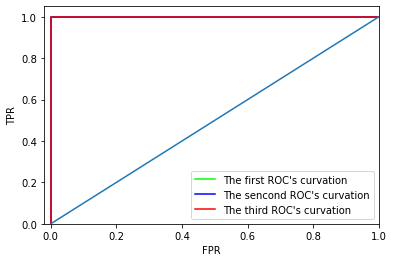

In [29]:
plt.step(FPRs0, TPRs0, label="The first ROC's curvation", color = '#00FF00')
plt.step(FPRs1, TPRs1, label="The sencond ROC's curvation", color = '#0000FF')
plt.step(FPRs2, TPRs2, label="The third ROC's curvation", color = '#FF0000')
plt.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.02, 1)
plt.ylim(0, 1.05)
plt.legend()
plt.show()

### AUC值

In [30]:
# 为曲线与FPR轴的面积
auc_area0 = 0
for i in range(1, len(TPRs0)):
    if FPRs0[i] != FPRs0[i - 1]:
        l0 = 0
        k0 = i
        # 计算横轴长度
        while(k0):
            if FPRs0[k0] != FPRs0[k0 - 1]:
                l0 += FPRs0[k0] - FPRs0[k0 - 1]
                k0 -= 1
            else:
                break
        auc_area0 += l0 * TPRs0[i] # 横轴乘纵轴
print("第一类的AUC值为：", auc_area0)

第一类的AUC值为： 1.0


In [31]:
# 为曲线与FPR轴的面积
auc_area1 = 0
for i in range(1, len(TPRs1)):
    if FPRs1[i] != FPRs1[i - 1]:
        l1 = 0
        k1 = i
        # 计算横轴长度
        while(k1):
            if FPRs1[k1] != FPRs1[k1 - 1]:
                l1 += FPRs1[k1] - FPRs1[k1 - 1]
                k1 -= 1
            else:
                break
        auc_area1 += l1 * TPRs1[i] # 横轴乘纵轴
print("第二类的AUC值为：", auc_area1)

第二类的AUC值为： 1.0


In [32]:
# 为曲线与FPR轴的面积
auc_area2 = 0
for i in range(1, len(TPRs2)):
    if FPRs2[i] != FPRs2[i - 1]:
        l2 = 0
        k2 = i
        # 计算横轴长度
        while(k2):
            if FPRs2[k2] != FPRs2[k2 - 1]:
                l2 += FPRs2[k2] - FPRs2[k2 - 1]
                k2 -= 1
            else:
                break
        auc_area2 += l2 * TPRs2[i] # 横轴乘纵轴
print("第三类的AUC值为：", auc_area2)

第三类的AUC值为： 1.0


## 总结与展望

### 总结
- 本次是机器学习的第四次实验，在做实验的过程中对朴素贝叶斯分类器更加的了解
- 在本次实验中也了解了贝叶斯分类的原理
- 在本次实验中也知道了什么是ROC曲线和AUC值，并对其进行实际编程，扩展了自己的知识面
- 最后也对机器学习的方法也更加的熟悉

### 展望
通过第四次实验，发现自己对机器学习有了更近一步的认识，希望自己能在本学期的课程中学到更多，也希望自己未来能有更好的发展✌️